In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from rembg import new_session, remove


In [41]:
root = '../cars/'
tripod = 'epfl-gims08/tripod-seq'
all_cars = sorted(os.listdir(os.path.join(root, tripod)))

path = 'tripod_seq_{:02d}_{:03d}.jpg'


input = Image.open(os.path.join(root, tripod, path.format(10, 26)))

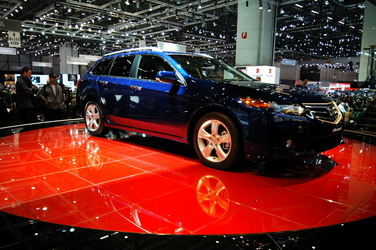

In [6]:
input

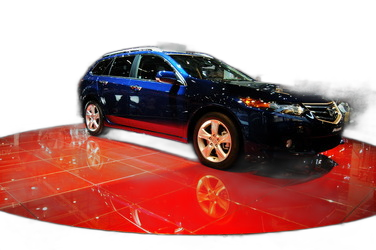

In [7]:
remove(input)


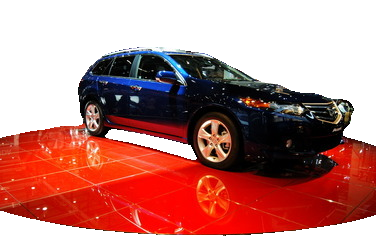

In [18]:
remove(input, alpha_matting=True, alpha_matting_foreground_threshold=270,alpha_matting_background_threshold=10, alpha_matting_erode_size=1, post_process_mask=True)

In [39]:
model_name = "isnet-general-use"
session_isnet = new_session(model_name)

100%|████████████████████████████████████████| 179M/179M [00:00<00:00, 331GB/s]


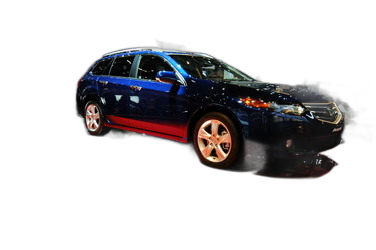

In [42]:
remove(input, session=session_isnet)

In [ ]:
model_name = "sam"
session = new_session(model_name)

In [26]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
   

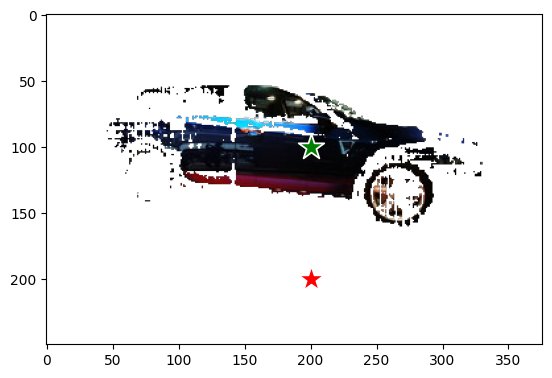

In [43]:
import numpy as np
# Define the points and labels
# The points are defined as [y, x]
input_points = np.array([[200, 100], [200, 200]])
input_labels = np.array([1, 0])

input = Image.open(os.path.join(root, tripod, path.format(10, 36)))

show_points(input_points, input_labels, plt.gca())
plt.imshow(remove(input, session=session, input_points=input_points, input_labels=input_labels))

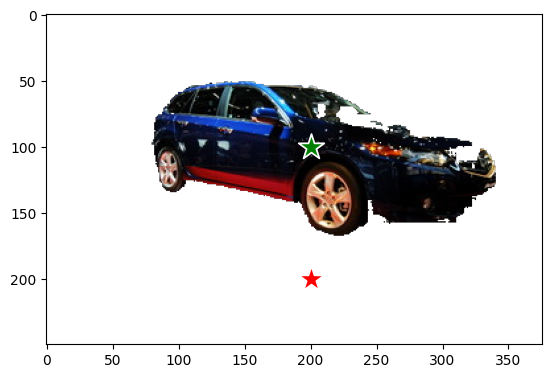

In [44]:
input = Image.open(os.path.join(root, tripod, path.format(10, 26)))

show_points(input_points, input_labels, plt.gca())
plt.imshow(remove(input, session=session, input_points=input_points, input_labels=input_labels))

In [ ]:
no_bg = sorted(os.listdir("../cars/no_background"))

In [ ]:
for car in no_bg[2100:2110]:
    img = Image.open(os.path.join("../cars/no_background", car))
    plt.imshow(img)
    plt.title(car)